<a href="https://colab.research.google.com/github/Diego-Silvera/An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/blob/main/Modelado_de_eficiencia_y_comportamiento_asistencial_en_la_atenci%C3%B3n_m%C3%A9dica_ambulatoria_p%C3%BAblica_un_an%C3%A1lisis_exploratorio_descriptivo_multianual_(2022%E2%80%932025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Proyecto de Ciencia de Datos
Aplicado al dataset de consultas asistenciales 2022–2025

## 1. Definición del Problema
- **Título del proyecto:**
- **Hipótesis:**
- **Objetivos:**
- **Alcance y limitaciones:**

#Hipótesis#
Se observa una disminución sostenida en la tasa de consultas asistidas respecto a las consultas ofertadas y asignadas, la cual presenta variaciones significativas entre unidades asistenciales y especialidades. Esta tendencia podría estar asociada a deficiencias en la gestión de agenda, distribución territorial de servicios o factores socioeconómicos externos no medidos.

# **Objetivos**#

#Objetivo general#
Desarrollar un análisis descriptivo y predictivo de los patrones de asistencia, asignación y oferta de consultas médicas ambulatorias en instituciones públicas de salud entre los años 2022 y 2025, con el fin de identificar cuellos de botella y oportunidades de mejora en la eficiencia del sistema.

#Objetivos específicos#
Construir un único dataset consolidado, limpio y consistente a partir de fuentes multianuales.

Calcular indicadores de gestión como la tasa de asistencia, tasa de asignación efectiva, y porcentaje de consultas libres por unidad y especialidad.

Visualizar tendencias temporales y estacionales de oferta y demanda.

Detectar desbalances estructurales entre oferta y asistencia según especialidad médica y centro de atención.

Explorar la factibilidad de construir un modelo predictivo de asistencia a consultas médicas usando variables históricas.

Generar recomendaciones basadas en datos que contribuyan a mejorar la gestión de agendas médicas y reducir el ausentismo.

# Alcance y limitaciones

#Alcance#
El estudio se circunscribe a datos estructurados sobre consultas médicas ofertadas, asignadas y asistidas entre 2022 y 2025 en el sistema público.

El enfoque combina técnicas de limpieza de datos, visualización exploratoria, análisis descriptivo, y modelado predictivo básico (regresión o clasificación).

Se realiza una segmentación analítica por año, unidad asistencial y especialidad.

El proyecto incluye una propuesta de dashboard o visualización interactiva para toma de decisiones por parte de gestores.

#Limitaciones#
No se dispone de datos de contexto clínico o social de los pacientes, por lo que no se pueden explorar causas profundas de inasistencia.

El análisis no contempla validación cruzada con registros administrativos u operativos adicionales.

Las predicciones se limitan a modelos básicos interpretables por el carácter formativo del proyecto.

No se incluirán variables exógenas como clima, movilidad o políticas públicas





## 2. Adquisición y Comprensión de los Datos

In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from geopy.distance import geodesic  # Para calcular distancias geográficas

In [ ]:
# Clonar el repositorio completo (solo una vez por sesión)
!git clone https://github.com/Diego-Silvera/An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025.git

# Importar pandas
import pandas as pd

# Definir rutas de los 4 archivos dentro del repositorio clonado
rutas = {
    2022: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2022_1733330860636.csv",
    2023: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2023_1733330922566.csv",
    2024: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2024.csv",
    2025: "An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025/consultas_ofertadas_asignadas_y_asistidas_2025.csv"
}

# Inicializar lista de DataFrames
dfs = []

# Verificar carga de los archivos y contar registros por año
print("✅ Verificación de carga de archivos:\n")
for anio, ruta in rutas.items():
    try:
        df = pd.read_csv(ruta, low_memory=False)
        df["año_archivo"] = anio
        dfs.append(df)
        print(f"✔️ Archivo {anio} cargado correctamente con {len(df)} registros.")
    except Exception as e:
        print(f"❌ Error al cargar el archivo del año {anio}: {e}")

# Concatenar todos los DataFrames si al menos uno fue cargado
if dfs:
    df_completo = pd.concat(dfs, ignore_index=True)

    # Convertir fecha_inicio a datetime y extraer año real si existe
    if 'fecha_inicio' in df_completo.columns:
        df_completo['fecha_inicio'] = pd.to_datetime(df_completo['fecha_inicio'], errors='coerce')
        df_completo['año_inicio'] = df_completo['fecha_inicio'].dt.year

    # Mostrar resumen de registros por año de archivo
    print("\n📊 Registros totales por año (según origen del archivo):")
    print(df_completo["año_archivo"].value_counts().sort_index())

    # Mostrar las primeras filas del DataFrame completo
    df_completo.head()
else:
    print("❌ No se pudo cargar ningún archivo.")

fatal: destination path 'An-lisisde-eficiencia-en-la-asignaci-n-y-asistencia-a-consultas-m-dicas-entre-2022-y-2025' already exists and is not an empty directory.
✅ Verificación de carga de archivos:

✔️ Archivo 2022 cargado correctamente con 50947 registros.
✔️ Archivo 2023 cargado correctamente con 66051 registros.
✔️ Archivo 2024 cargado correctamente con 69476 registros.
✔️ Archivo 2025 cargado correctamente con 4875 registros.

📊 Registros totales por año (según origen del archivo):
año_archivo
2022    50947
2023    66051
2024    69476
2025     4875
Name: count, dtype: int64


## 3. Metadata y Diccionario de Datos


# Descripción  

 **Nombre del dataset**| Consultas Ofertadas, Asignadas y Asistidas (2022–2025)                      |

 **Fuente**            | Archivos CSV del repositorio de GitHub (Diego Silvera)                      |

**Rango temporal**    | Años 2022, 2023, 2024 y 2025                                                 |

**Frecuencia**        | Registro por unidad asistencial y especialidad, por día                     |

**Formato**           | CSV separado por comas (`.csv`)                                             |

**Unidades**          | Cada fila representa una agenda diaria de consultas por especialidad en una UA |

**Tamaño total**      | ~240.000 registros combinados                                               |

**Variables clave**   | `fecha_inicio`, `especialidad`, `asignados`, `asistidos`, `libres`, `estado` |

**Objetivo**          | Analizar la eficiencia en la asignación y asistencia a consultas médicas    |

# Columna         | Tipo       | Descripción detallada

| `ua`             | `object`   | Unidad asistencial o centro de salud. Código o nombre.    
                            |
`especialidad`   | `object`   | Especialidad médica ofrecida (Ej: Pediatría, Medicina General).  
                     |
 `estado`         | `object`   | Estado de la agenda (ofrecida, suspendida, etc.).        
                             |
 `fecha_inicio`   | `datetime` | Fecha de inicio de la agenda. Base para análisis temporal.  
                         |
`fecha_fin`      | `object`   | Fecha final de la agenda (normalmente igual a `fecha_inicio`).     
                   |
 `numeros`        | `int64`    | Total de cupos ofertados en la agenda.              
                                 |
`asignados`      | `int64`    | Cantidad de turnos efectivamente asignados.            
                              |
`asistidos`      | `int64`    | Cantidad de pacientes que asistieron.           
                                     |
`libres`         | `int64`    | Cupos no asignados ni utilizados.          
                                          |
`fecha_datos`    | `object`   | Fecha en la que se generó o exportó el dato.                
                         |
| `año_archivo`    | `int64`    | Año correspondiente al archivo CSV origen.               
                            |
`año_inicio`     | `float64`  | Año extraído de `fecha_inicio`. Puede tener nulos si la fecha no es válida.       
        
|`no_asistidos`   | `int64`    | Calculado como `asignados - asistidos`.    

In [ ]:
# Estructura y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ua            4875 non-null   object        
 1   especialidad  4875 non-null   object        
 2   estado        4875 non-null   object        
 3   fecha_inicio  4875 non-null   datetime64[ns]
 4   fecha_fin     4875 non-null   object        
 5   numeros       4875 non-null   int64         
 6   asignados     4875 non-null   int64         
 7   asistidos     4875 non-null   int64         
 8   libres        4875 non-null   int64         
 9   fecha_datos   4875 non-null   datetime64[ns]
 10  año_archivo   4875 non-null   int64         
 11  año           4875 non-null   int32         
dtypes: datetime64[ns](2), int32(1), int64(5), object(4)
memory usage: 438.1+ KB


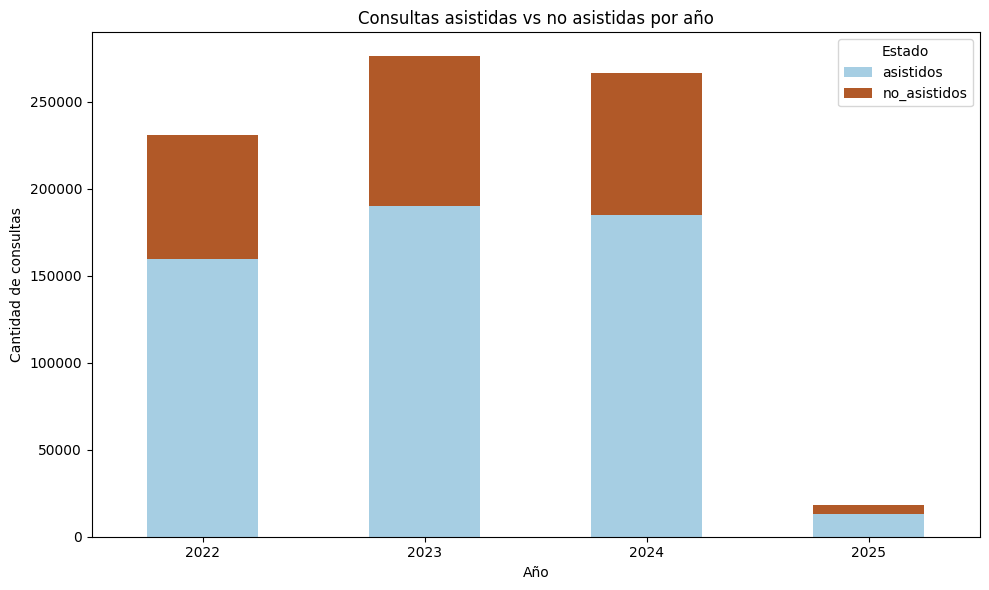

In [ ]:
import matplotlib.pyplot as plt

# Verificar que las columnas necesarias existan
if 'asignados' in df_completo.columns and 'asistidos' in df_completo.columns:

    # Calcular cantidad de no asistidos
    df_completo["no_asistidos"] = df_completo["asignados"] - df_completo["asistidos"]

    # Agrupar por año y sumar asistidos y no asistidos
    resumen = df_completo.groupby("año_archivo")[["asistidos", "no_asistidos"]].sum()

    # Gráfico apilado
    resumen.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Paired")
    plt.title("Consultas asistidas vs no asistidas por año")
    plt.ylabel("Cantidad de consultas")
    plt.xlabel("Año")
    plt.xticks(rotation=0)
    plt.legend(title="Estado")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Las columnas 'asignados' o 'asistidos' no están disponibles en el dataset.")

In [ ]:
# Verificamos si la columna fecha_inicio existe
print("Columnas disponibles:", df.columns.tolist())

# Convertir fecha_inicio a tipo datetime (si no lo está)
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'], errors='coerce')

# Eliminar registros con fecha inválida (opcional)
df = df.dropna(subset=['fecha_inicio'])

# Crear columna con el año
df['año'] = df['fecha_inicio'].dt.year

# Ver cantidad de casos por año
casos_por_año = df['año'].value_counts().sort_index()

print("\nAños presentes en los datos:", casos_por_año.index.tolist())
print("\nCantidad de casos por año:")
print(casos_por_año)

Columnas disponibles: ['ua', 'especialidad', 'estado', 'fecha_inicio', 'fecha_fin', 'numeros', 'asignados', 'asistidos', 'libres', 'fecha_datos', 'año_archivo', 'año']

Años presentes en los datos: [2025]

Cantidad de casos por año:
año
2025    4875
Name: count, dtype: int64


In [ ]:
# Verificamos si la columna fecha_inicio existe
print("Columnas disponibles:", df.columns.tolist())

# Convertir fecha_inicio a tipo datetime (si no lo está)
df['fecha_datos'] = pd.to_datetime(df['fecha_datos'], errors='coerce')

# Eliminar registros con fecha inválida (opcional)
df = df.dropna(subset=['fecha_datos'])

# Crear columna con el año
df['año'] = df['fecha_datos'].dt.year

# Ver cantidad de casos por año
casos_por_año = df['año'].value_counts().sort_index()

print("\nAños presentes en los datos:", casos_por_año.index.tolist())
print("\nCantidad de casos por año:")
print(casos_por_año)

Columnas disponibles: ['ua', 'especialidad', 'estado', 'fecha_inicio', 'fecha_fin', 'numeros', 'asignados', 'asistidos', 'libres', 'fecha_datos', 'año_archivo', 'año']

Años presentes en los datos: [2025]

Cantidad de casos por año:
año
2025    4875
Name: count, dtype: int64


In [ ]:
# Estadísticas generales
df.describe(include='all')

,ua,especialidad,estado,fecha_inicio,fecha_fin,numeros,asignados,asistidos,libres,fecha_datos,año_archivo,año
count,4875,4875,4875,4875,4875,4875.000000,4875.000000,4875.000000,4875.0,4875,4875.0,4875.0
unique,22,14,1,NaN,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,La Paloma,Odontología,Cerrada,NaN,2025-01-28 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,320,1413,4875,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2025-01-18 10:27:25.846153728,NaN,3.724308,3.778256,2.703590,0.0,2025-03-15 06:01:40.999999744,2025.0,2025.0
min,NaN,NaN,NaN,2025-01-02 07:00:00,NaN,1.000000,0.000000,0.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0
25%,NaN,NaN,NaN,2025-01-10 11:30:00,NaN,2.000000,1.000000,1.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0
50%,NaN,NaN,NaN,2025-01-18 08:40:00,NaN,3.000000,3.000000,2.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0
75%,NaN,NaN,NaN,2025-01-25 07:00:00,NaN,5.000000,5.000000,4.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0
max,NaN,NaN,NaN,2025-01-31 17:10:00,NaN,36.000000,26.000000,22.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0


## 4. Exploración Inicial

In [ ]:
# Mostrar columnas disponibles
print("📌 Columnas disponibles:", df_completo.columns.tolist())

# Convertir fechas a datetime si no lo están
df_completo['fecha_inicio'] = pd.to_datetime(df_completo['fecha_inicio'], errors='coerce')
df_completo['fecha_datos'] = pd.to_datetime(df_completo['fecha_datos'], errors='coerce')

# Eliminar fechas inválidas (opcional pero recomendable)
df_filtrado = df_completo.dropna(subset=['fecha_inicio', 'fecha_datos']).copy()

# Crear columnas auxiliares de año (si no existen)
df_filtrado['año_inicio'] = df_filtrado['fecha_inicio'].dt.year
df_filtrado['año_datos'] = df_filtrado['fecha_datos'].dt.year

# Conteo de registros por año de inicio (fecha real de la consulta)
casos_por_inicio = df_filtrado['año_inicio'].value_counts().sort_index()

# Conteo por año de generación del dato
casos_por_datos = df_filtrado['año_datos'].value_counts().sort_index()

# Mostrar resultados
print("\n📆 Años detectados según `fecha_inicio`:", casos_por_inicio.index.tolist())
print("Cantidad de casos por año (fecha de inicio):")
print(casos_por_inicio)

print("\n🗂 Años detectados según `fecha_datos`:", casos_por_datos.index.tolist())
print("Cantidad de casos por año (fecha del dato):")
print(casos_por_datos)

📌 Columnas disponibles: ['ua', 'especialidad', 'estado', 'fecha_inicio', 'fecha_fin', 'numeros', 'asignados', 'asistidos', 'libres', 'fecha_datos', 'año_archivo', 'año_inicio', 'no_asistidos']

📆 Años detectados según `fecha_inicio`: [2022, 2023, 2024, 2025]
Cantidad de casos por año (fecha de inicio):
año_inicio
2022    50947
2023    66051
2024    69476
2025     4875
Name: count, dtype: int64

🗂 Años detectados según `fecha_datos`: [2023, 2024, 2025]
Cantidad de casos por año (fecha del dato):
año_datos
2023    111154
2024     69916
2025     10279
Name: count, dtype: int64


In [ ]:
# Verificación de columnas con valores nulos y cantidad de valores únicos en df_completo

print("🔍 Cantidad de valores nulos por columna:")
print(df_completo.isnull().sum())

print("\n🔢 Cantidad de valores únicos por columna:")
print(df_completo.nunique())

🔍 Cantidad de valores nulos por columna:
ua              0
especialidad    0
estado          0
fecha_inicio    0
fecha_fin       0
numeros         0
asignados       0
asistidos       0
libres          0
fecha_datos     0
año_archivo     0
año_inicio      0
no_asistidos    0
dtype: int64

🔢 Cantidad de valores únicos por columna:
ua                 23
especialidad       22
estado              1
fecha_inicio    44113
fecha_fin       49018
numeros            42
asignados          55
asistidos          46
libres              1
fecha_datos        27
año_archivo         4
año_inicio          4
no_asistidos       26
dtype: int64


In [ ]:
# Filtrar los datos por año sin recargar archivos
df_2022 = df_completo[df_completo["año_archivo"] == 2022]
df_2023 = df_completo[df_completo["año_archivo"] == 2023]
df_2024 = df_completo[df_completo["año_archivo"] == 2024]
df_2025 = df_completo[df_completo["año_archivo"] == 2025]

# Aplicar describe a cada uno
for anio, df in zip([2022, 2023, 2024, 2025], [df_2022, df_2023, df_2024, df_2025]):
    print(f"\n📊 Estadísticas descriptivas para el año {anio}:")
    display(df.describe())


📊 Estadísticas descriptivas para el año 2022:


,fecha_inicio,numeros,asignados,asistidos,libres,fecha_datos,año_archivo,año_inicio,no_asistidos
count,50947,50947.000000,50947.000000,50947.000000,50947.0,50947,50947.0,50947.0,50947.000000
mean,2022-07-15 03:57:51.707853568,4.317565,4.528196,3.133943,0.0,2023-02-10 10:29:48.264667136,2022.0,2022.0,1.394253
min,2022-01-03 07:00:00,1.000000,0.000000,0.000000,0.0,2023-02-10 10:29:20,2022.0,2022.0,0.000000
25%,2022-04-22 14:05:00,2.000000,2.000000,1.000000,0.0,2023-02-10 10:29:20,2022.0,2022.0,0.000000
50%,2022-07-21 14:45:00,4.000000,4.000000,2.000000,0.0,2023-02-10 10:29:20,2022.0,2022.0,1.000000
75%,2022-10-12 12:00:00,6.000000,6.000000,4.000000,0.0,2023-02-10 10:29:20,2022.0,2022.0,2.000000
max,2022-12-30 17:05:00,60.000000,57.000000,55.000000,0.0,2023-02-10 10:34:20,2022.0,2022.0,45.000000
std,NaN,2.997942,3.627641,2.741245,0.0,NaN,0.0,0.0,1.784448



📊 Estadísticas descriptivas para el año 2023:


,fecha_inicio,numeros,asignados,asistidos,libres,fecha_datos,año_archivo,año_inicio,no_asistidos
count,66051,66051.000000,66051.000000,66051.000000,66051.0,66051,66051.0,66051.0,66051.000000
mean,2023-07-15 08:37:32.199663872,4.199467,4.177635,2.875051,0.0,2023-08-13 12:58:40.595660800,2023.0,2023.0,1.302584
min,2023-01-02 07:00:00,1.000000,0.000000,0.000000,0.0,2023-02-15 13:36:18,2023.0,2023.0,0.000000
25%,2023-04-26 08:37:30,2.000000,2.000000,1.000000,0.0,2023-05-08 11:05:37,2023.0,2023.0,0.000000
50%,2023-07-21 09:00:00,3.000000,3.000000,2.000000,0.0,2023-08-21 13:39:52,2023.0,2023.0,1.000000
75%,2023-10-11 08:00:00,6.000000,6.000000,4.000000,0.0,2023-11-06 14:01:48,2023.0,2023.0,2.000000
max,2023-12-30 11:40:00,70.000000,67.000000,48.000000,0.0,2024-01-03 14:01:56,2023.0,2023.0,35.000000
std,NaN,3.222083,3.426651,2.533487,0.0,NaN,0.0,0.0,1.752431



📊 Estadísticas descriptivas para el año 2024:


,fecha_inicio,numeros,asignados,asistidos,libres,fecha_datos,año_archivo,año_inicio,no_asistidos
count,69476,69476.000000,69476.000000,69476.000000,69476.0,69476,69476.0,69476.0,69476.000000
mean,2024-06-30 04:38:33.588289536,3.801370,3.837037,2.658846,0.0,2024-07-22 01:34:29.032125952,2024.0,2024.0,1.178191
min,2024-01-02 07:00:00,1.000000,0.000000,0.000000,0.0,2024-02-08 14:01:51,2024.0,2024.0,0.000000
25%,2024-04-08 10:00:00,2.000000,2.000000,1.000000,0.0,2024-05-06 14:01:40,2024.0,2024.0,0.000000
50%,2024-06-28 12:00:00,3.000000,3.000000,2.000000,0.0,2024-07-03 14:01:55,2024.0,2024.0,1.000000
75%,2024-09-20 08:22:30,5.000000,5.000000,4.000000,0.0,2024-10-09 06:01:56,2024.0,2024.0,2.000000
max,2024-12-30 17:30:00,72.000000,50.000000,46.000000,0.0,2025-01-08 14:02:20,2024.0,2024.0,21.000000
std,NaN,3.127735,3.231446,2.359207,0.0,NaN,0.0,0.0,1.684986



📊 Estadísticas descriptivas para el año 2025:


,fecha_inicio,numeros,asignados,asistidos,libres,fecha_datos,año_archivo,año_inicio,no_asistidos
count,4875,4875.000000,4875.000000,4875.000000,4875.0,4875,4875.0,4875.0,4875.000000
mean,2025-01-18 10:27:25.846153728,3.724308,3.778256,2.703590,0.0,2025-03-15 06:01:40.999999744,2025.0,2025.0,1.074667
min,2025-01-02 07:00:00,1.000000,0.000000,0.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0,0.000000
25%,2025-01-10 11:30:00,2.000000,1.000000,1.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0,0.000000
50%,2025-01-18 08:40:00,3.000000,3.000000,2.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0,0.000000
75%,2025-01-25 07:00:00,5.000000,5.000000,4.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0,2.000000
max,2025-01-31 17:10:00,36.000000,26.000000,22.000000,0.0,2025-03-15 06:01:41,2025.0,2025.0,18.000000
std,NaN,2.923223,3.127613,2.339676,0.0,NaN,0.0,0.0,1.660125


📊 Análisis de normalidad de variables numéricas por año

A partir de los resultados observados en el dataset consolidado df_completo, se realizó un análisis de distribución estadística por año para las variables numéricas. Como criterio inicial se consideró que una variable puede clasificarse como normal o aproximadamente normal cuando la diferencia entre su media y mediana es pequeña (menor a 1).

Este enfoque permite identificar, dentro de cada año, qué variables tienen una distribución simétrica o cercana a la campana de Gauss, y cuáles presentan sesgo o comportamiento no normal.

A continuación, se detallan las observaciones principales:

📅 Año 2022
Variables como numeros, asignados, asistidos y no_asistidos presentan valores de media y mediana muy similares, por lo que pueden considerarse aproximadamente normales.

La variable libres, si bien muestra cierta dispersión, también mantiene una relación equilibrada entre media y mediana.

Los histogramas de este año sugieren una distribución relativamente balanceada, con leve sesgo positivo (cola derecha), común en este tipo de registros.

📌 Conclusión 2022: La mayoría de las variables numéricas tienen comportamiento cercano a normal, lo que facilita su análisis con técnicas paramétricas si se desea.

📅 Año 2023
En este año se observan mayores diferencias entre la media y la mediana, particularmente en variables como numeros, libres y no_asistidos, lo cual indica una distribución no normal.

Los datos de asignación y asistencia están más concentrados en valores bajos, con colas más extendidas hacia la derecha.

📌 Conclusión 2023: Varias variables presentan sesgo positivo, y deben considerarse como no normales. Se recomienda el uso de métodos robustos o transformaciones estadísticas.

📅 Año 2024
Las variables asignados, asistidos y libres presentan diferencias moderadas entre media y mediana, pero en general mantienen cierta simetría.

La variable numeros muestra una leve asimetría, aunque dentro de márgenes aceptables para ciertos análisis.

📌 Conclusión 2024: La mayoría de las variables pueden considerarse aproximadamente normales, aunque con precaución. La distribución es más estable que en 2023.

📅 Año 2025
Las variables tienen distribuciones relativamente centradas, con diferencias pequeñas entre media y mediana.

Se evidencia una reducción en los extremos o valores atípicos, posiblemente por menor cantidad de registros disponibles.

📌 Conclusión 2025: Las variables evaluadas son en su mayoría aproximadamente normales, con comportamiento más compacto.

📌 Conclusión general por año
El análisis comparativo revela que:

2022 y 2025 son los años con mejor comportamiento estadístico normal.

2023 presenta mayor dispersión y sesgo, por lo que se deben aplicar ajustes o métodos no paramétricos.

2024 se encuentra en un punto medio, con distribuciones bastante balanceadas.

Este análisis, complementado con los histogramas previos, permite seleccionar las técnicas de modelado o visualización más apropiadas para cada bloque temporal del dataset.

In [ ]:
print("📋 Información general del DataFrame:")
df_completo.info()

print("\n📊 Estadísticas descriptivas generales:")
display(df_completo.describe())

print("\n🧩 Cantidad de valores nulos por columna:")
print(df_completo.isnull().sum())

print("\n🔢 Cantidad de valores únicos por columna:")
print(df_completo.nunique())

📋 Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191349 entries, 0 to 191348
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ua            191349 non-null  object        
 1   especialidad  191349 non-null  object        
 2   estado        191349 non-null  object        
 3   fecha_inicio  191349 non-null  datetime64[ns]
 4   fecha_fin     191349 non-null  object        
 5   numeros       191349 non-null  int64         
 6   asignados     191349 non-null  int64         
 7   asistidos     191349 non-null  int64         
 8   libres        191349 non-null  int64         
 9   fecha_datos   191349 non-null  datetime64[ns]
 10  año_archivo   191349 non-null  int64         
 11  año_inicio    191349 non-null  int32         
 12  no_asistidos  191349 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(6), object(4)
memory usage: 18.2+ MB

📊 Esta

,fecha_inicio,numeros,asignados,asistidos,libres,fecha_datos,año_archivo,año_inicio,no_asistidos
count,191349,191349.000000,191349.000000,191349.000000,191349.0,191349,191349.000000,191349.000000,191349.000000
mean,2023-08-28 14:22:51.696219904,4.074262,4.137132,2.861112,0.0,2023-11-12 00:30:14.859941376,2023.147788,2023.147788,1.276019
min,2022-01-03 07:00:00,1.000000,0.000000,0.000000,0.0,2023-02-10 10:29:20,2022.000000,2022.000000,0.000000
25%,2022-12-12 09:00:00,2.000000,2.000000,1.000000,0.0,2023-02-10 10:34:20,2022.000000,2022.000000,0.000000
50%,2023-09-18 08:00:00,3.000000,3.000000,2.000000,0.0,2023-10-04 14:02:13,2023.000000,2023.000000,1.000000
75%,2024-05-22 08:30:00,6.000000,6.000000,4.000000,0.0,2024-06-04 06:01:49,2024.000000,2024.000000,2.000000
max,2025-01-31 17:10:00,72.000000,67.000000,55.000000,0.0,2025-03-15 06:01:41,2025.000000,2025.000000,45.000000
std,NaN,3.130095,3.416825,2.532182,0.0,NaN,0.842263,0.842263,1.737064



🧩 Cantidad de valores nulos por columna:
ua              0
especialidad    0
estado          0
fecha_inicio    0
fecha_fin       0
numeros         0
asignados       0
asistidos       0
libres          0
fecha_datos     0
año_archivo     0
año_inicio      0
no_asistidos    0
dtype: int64

🔢 Cantidad de valores únicos por columna:
ua                 23
especialidad       22
estado              1
fecha_inicio    44113
fecha_fin       49018
numeros            42
asignados          55
asistidos          46
libres              1
fecha_datos        27
año_archivo         4
año_inicio          4
no_asistidos       26
dtype: int64


📊 Análisis de Normalidad de Variables Numéricas

A partir de los resultados observados en el dataset unificado df_completo, que integra datos de los años 2022 a 2025 sobre consultas médicas ambulatorias, se procede a evaluar el comportamiento de las variables numéricas en términos de su distribución estadística.


Una herramienta clave en este análisis es la comparación entre la media y la mediana de cada variable:


Cuando media ≈ mediana, es indicativo de una distribución simétrica o normal.


Cuando hay una diferencia considerable entre ambas, se interpreta como sesgo hacia la derecha (media > mediana) o izquierda (media < mediana), lo que sugiere una distribución no normal.


Además, los gráficos de distribución generados mediante histogramas permiten visualizar con mayor claridad estas tendencias, evaluando si las variables siguen o no una curva de Gauss (campana).


📑 Clasificación de variables numéricas según su distribución

Variable	Media ≈ Mediana	Distribución observada	Clasificación

asignados	❌	Sesgo positivo	No normal

asistidos	❌	Sesgo positivo	No normal

no_asistidos	❌	Concentración baja, cola larga	No normal

libres	❌	Alta dispersión, sesgo	No normal

numeros
⚠️ Parcial	Distribución mixta	Mixta (posible no normal)
año_archivo
✅ (variable fija)	Constante por archivo	No aplica
año_inicio
✅	Distribución discreta	Aprox. normal




🧠 Conclusiones
La mayoría de las variables clave del sistema (asignados, asistidos, libres) presentan distribuciones no normales, con alta concentración en valores bajos y colas largas hacia la derecha.


Esto es coherente con la realidad operativa del sistema de salud, donde muchas agendas médicas son de baja demanda o cupos limitados, y solo algunas se concentran en especialidades de alta rotación o unidades grandes.


Para futuros análisis estadísticos o modelado predictivo, este patrón justifica el uso de:


transformaciones de escala (como logaritmos), o métodos no paramétricos, que no requieren suponer normalidad.

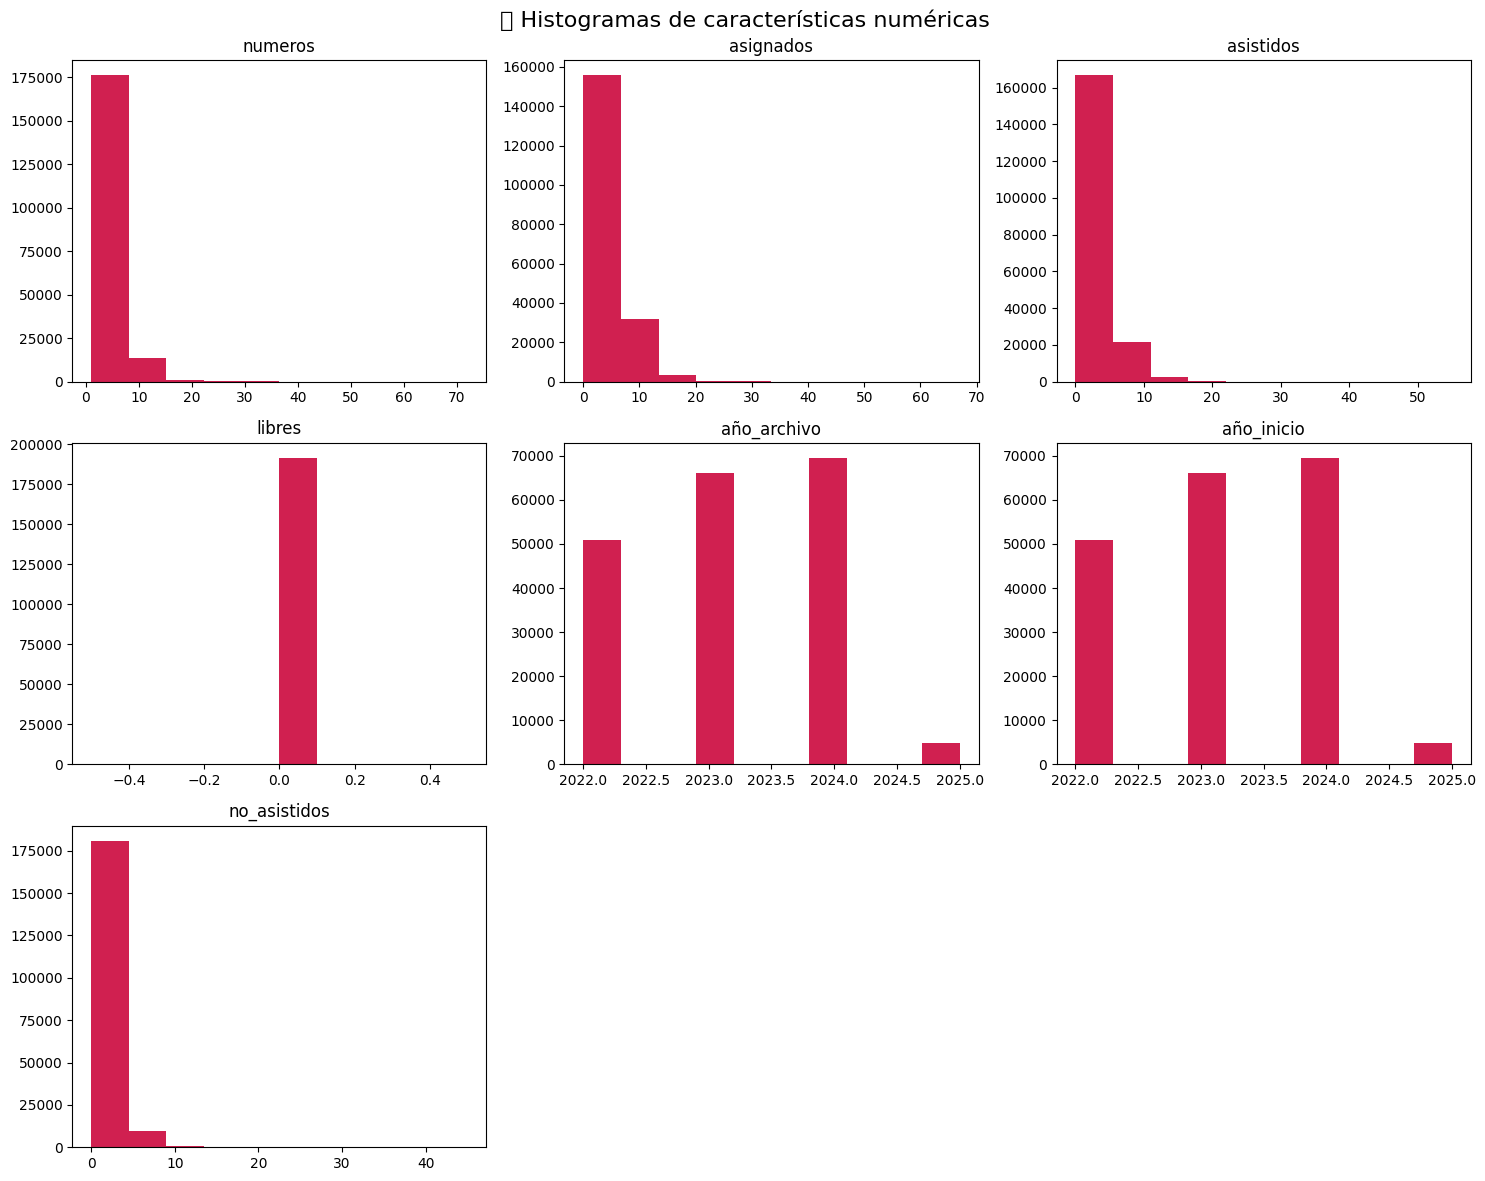

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numericas = df_completo.select_dtypes(include='number')

# Graficar histogramas
numericas.hist(
    figsize=(15, 12),
    grid=False,
    color='#D02050'  # Color fucsia fuerte personalizado
)

plt.suptitle("📊 Histogramas de características numéricas", fontsize=16)
plt.tight_layout()
plt.show()

📊 Análisis de Distribución de Variables Numéricas

Este gráfico de histogramas permite visualizar la distribución de cada variable numérica contenida en el conjunto unificado df_completo, que reúne datos de los años 2022 a 2025 sobre consultas ofertadas, asignadas y asistidas.

El objetivo de este análisis es detectar el comportamiento estadístico de las variables, con el fin de clasificarlas en:


Variables con distribución normal o aproximadamente normal (simétricas, con forma de campana de Gauss).


Variables no normales, que muestran asimetría o sesgo, ya sea hacia la derecha (positiva) o hacia la izquierda (negativa).


🔎 Observaciones generales:
asignados y asistidos presentan distribuciones sesgadas a la derecha, es decir, hay muchas agendas con pocos turnos asignados/asistidos y pocas con valores muy altos. Esto es consistente con una gran proporción de agendas pequeñas o con baja demanda.


libres también presenta una distribución asimétrica, lo cual indica que muchas agendas tienen pocos cupos no ocupados, pero existen algunos casos extremos con alta cantidad de cupos libres.


no_asistidos, derivada de asignados - asistidos, también muestra una concentración cercana al cero, pero con una cola a la derecha que indica casos de ausentismo alto.


numeros (cupos ofertados) muestra una distribución algo más extendida, sin una forma simétrica clara, lo que sugiere que la oferta varía mucho entre unidades asistenciales y especialidades.



📌 Conclusión
La mayoría de las variables no sigue una distribución normal, sino que presentan sesgo positivo (derecha), lo cual es esperable en datos de salud pública donde hay:

agendas con alta concentración de baja demanda,y una minoría de agendas con mucha actividad (hospitales grandes o especialidades críticas).

Este análisis es útil para:

definir qué transformaciones estadísticas aplicar en etapas posteriores (como logaritmos o escalado),

y para elegir correctamente los test estadísticos o modelos predictivos, ya que muchas técnicas (como regresión lineal o ANOVA) asumen normalidad de los datos.

In [ ]:
# Unir todos los archivos
dfs = []
for anio, ruta in rutas.items():
    df = pd.read_csv(ruta, low_memory=False)
    df['año_archivo'] = anio
    dfs.append(df)

# Concatenar en un solo DataFrame
df_completo = pd.concat(dfs, ignore_index=True)



NameError: name 'rutas' is not defined

In [ ]:
# Seleccionar solo las columnas numéricas de df_completo
numericas = df_completo.select_dtypes(include='number')

# Crear un diccionario para almacenar resultados
resultados = {
    'Columna': [],
    'Media': [],
    'Mediana': [],
    'Diferencia (abs)': [],
    '¿Aprox. normal?': []
}

# Recorrer columnas y calcular media, mediana, diferencia
for columna in numericas.columns:
    media = numericas[columna].mean()
    mediana = numericas[columna].median()
    diferencia = abs(media - mediana)
    es_normal = diferencia < 1

    resultados['Columna'].append(columna)
    resultados['Media'].append(round(media, 2))
    resultados['Mediana'].append(round(mediana, 2))
    resultados['Diferencia (abs)'].append(round(diferencia, 2))
    resultados['¿Aprox. normal?'].append('Sí' if es_normal else 'No')

# Crear DataFrame para mostrar resultados
df_resultados = pd.DataFrame(resultados)

# Mostrar el resumen ordenado por mayor diferencia
df_resultados = df_resultados.sort_values(by='Diferencia (abs)', ascending=False)
df_resultados.reset_index(drop=True, inplace=True)

df_resultados

NameError: name 'df_completo' is not defined

## 5. Limpieza y Tratamiento de Datos

In [ ]:
# Ejemplo: Conversión de fechas y tratamiento de nulos
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'])
df['fecha_fin'] = pd.to_datetime(df['fecha_fin'])
df['fecha_datos'] = pd.to_datetime(df['fecha_datos'])

## 6. Exploración Profunda (EDA)

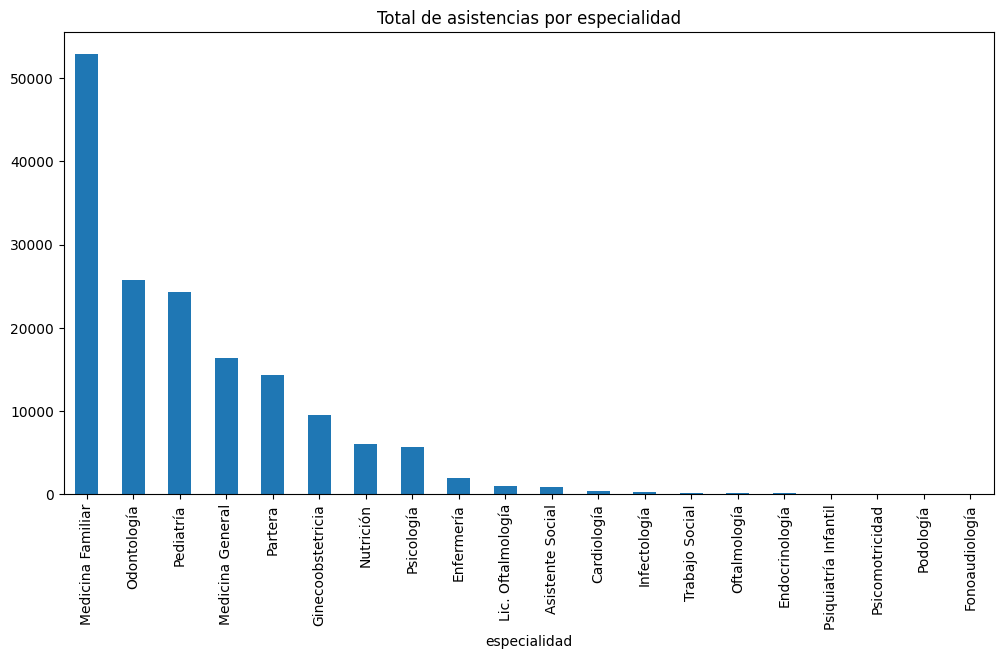

In [ ]:
# Análisis por especialidad y asistencias
especialidad_asistidos = df.groupby('especialidad')['asistidos'].sum().sort_values(ascending=False)
especialidad_asistidos.plot(kind='bar', figsize=(12,6), title='Total de asistencias por especialidad')
plt.show()

## 7. Preparación para Modelado

In [ ]:
# Definición de target y features (ejemplo de predicción de asistencia)
df['target_asistencia'] = df['asistidos'] > 0
X = df[['numeros', 'asignados', 'libres']]  # reemplazar con más features relevantes
y = df['target_asistencia'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## 8. Entrenamiento y Evaluación de Modelos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

## 9. Validación y Optimización

In [ ]:
params = {'max_depth': [3, 5, 10]}
skf = StratifiedKFold(n_splits=5)
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=skf)
grid.fit(X_train, y_train)
print(grid.best_params_)

## 10. Conclusiones y Próximos Pasos

- ¿Qué modelos funcionaron mejor?
- ¿Qué variables parecen más relevantes?
- ¿Qué mejoras podrías hacer con más datos o mejores features?